In [1]:
import torch
from d2l import torch as d2l
from torch import nn

Setting $H_t^{(0)} = X_t \in \mathbb{R}^{n \times d}$ ($n$: number of examples, $d$: number of inputs in each example), the hidden state of the $l$th hidden layer that uses the activation function $\varphi_{l}$ is calculated as follows:
\begin{equation}
    H_t^{(l)} = \varphi_{l}(H_t^{(l-1)} W_{xh}^{(l)} + H_{t-1}^{(l)} W_{hh}^{(l)} + b_h^{(l)}),
\end{equation}
where the weights $W_{xh}^{(l)} \in \mathbb{R}^{h \times h}$ and $W_{hh}^{(l)} \in \mathbb{R}^{h \times h}$, together with the bias $b_h^{(l)} \in \mathbb{R}^{l \times h}$, are the model parameters of the $l$th hidden layer. <br>
In the end, the calculation of the output layer is only based on the hidden state of the final$
$Lth hidden laye
\begin{equation}
    O_t = H_t^{(L)} W_{hq} + b_q,
\end{equation}
where the weight $W_{hq} \in \mathbb{R}^{h \times q}$ and the bias $b_q \in \mathbb{R}^{l \times q}$ are the model parameters of the output layer.:

In [2]:
class StackedRNNScratch(d2l.Module):
    def __init__(self, num_inputs, num_hiddens, num_layers, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.rnns = nn.Sequential(
            *[d2l.RNNScratch(num_inputs if i == 0 else num_hiddens, num_hiddens, sigma) for i in range(num_layers)])

    def forward(self, inputs, Hs=None):
        outputs = inputs
        if Hs is None: Hs = [None] * self.num_layers
        for i in range(self.num_layers):
            outputs, Hs[i] = self.rnns[i](outputs, Hs[i])
            outputs = torch.stack(outputs, 0)
        return outputs, Hs

**REMARK**. Hs[i] has shape: (batch_size, num_hiddens). Like in 1 hidden layer RNN, the shape of hidden state does not depend on the number of steps.

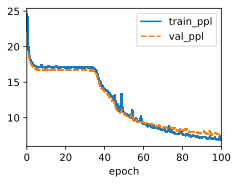

In [3]:
batch_size = 1024
num_steps = 30
num_hiddens = 16
num_layers = 2
data = d2l.TimeMachine(batch_size=batch_size, num_steps=num_steps)
rnn_block = StackedRNNScratch(num_inputs=len(data.vocab),
                              num_hiddens=num_hiddens, num_layers=num_layers)
model = d2l.RNNLMScratch(rnn_block, vocab_size=len(data.vocab), lr=2)
trainer = d2l.Trainer(max_epochs=100, gradient_clip_val=1, num_gpus=1)
trainer.fit(model, data)

In [4]:
model.configure_optimizers()

SGD (
Parameter Group 0
    dampening: 0
    foreach: None
    lr: 2
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [5]:
model.predict('it has', 20, data.vocab, d2l.try_gpu())

'it has the the the the the'